# Problema de puntuación de un vino utilizando la librería de Sklearn
Lo primero que se tiene que realizar es importar todas las librerías para la manipulación, visualización y entrenamiento del modelo, así mismo, será necesario realizar una lectura del archivo que contenga los datos del problema y una primera revisión.

In [1]:
#Importación de librerías y funciones necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Lectura de los archivos
path = "dataset/"
red_file = "winequality-red.csv"
white_file = "winequality-white.csv"

red_wine = pd.read_csv(path + red_file, sep = ';')
white_wine = pd.read_csv(path + white_file, sep = ';')

print(red_wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Haciendo una revisón rápida de las tablas obtenidas de la lectura del archivo *.csv* notamos que cada vino cuenta con 12 columnas: 
- Fixed acidity:
- Volatile acidity
- Citirc acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol
- Quality


De este análisis rápido se intentará sacar una relación de las primeras 11 variables con la última, además, debido a que todos son datos numéricos se podrán usar los valores sacados del documento de manera *cruda*

## Caso 1: Vino rojo

In [43]:
#Armamos los vectores con los campos que se utilizarán
x1 = np.array(red_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], dtype=float)
y1 = np.array(red_wine[['quality']], dtype=np.float)

#Dividimos los datos entre datos de entrenamiento y de validación
ts1 = 0.20 #Porcentaje de prueba
seed1 = 101 #Semilla para los datos aleatorios
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=ts1, random_state=seed1)

#Entrenamos
w1 = LinearRegression().fit(x1_train, y1_train)

print('coeficientes obtenidos del entrenamiento para el caso del vino rojo\n')

for i in  range(np.shape(w1.coef_)[1]):
    print(f'{red_wine.columns[i]}: {w1.coef_[0, i]}')


coeficientes obtenidos del entrenamiento para el caso del vino rojo

fixed acidity: 0.0290763016263296
volatile acidity: -1.1831803768691957
citric acid: -0.27601213687472875
residual sugar: 0.012420332663150888
chlorides: -1.8166063756932151
free sulfur dioxide: 0.002517786112030962
total sulfur dioxide: -0.002902224686822219
density: -1.662153109462873
pH: -0.424996183992045
sulphates: 0.8745938715081673
alcohol: 0.30538250010194173


Una vez obtenidos los coeficientes y al darnos cuenta que todos se encuentran dentro del mismo orden de magnitud, no será necesario aplicar ningún método de normalización. Únicamente procedemos a verificar que existe una buena correlación entre las calidades predichas y las reales.

Coeficiente de correlación: 0.24005809888777474


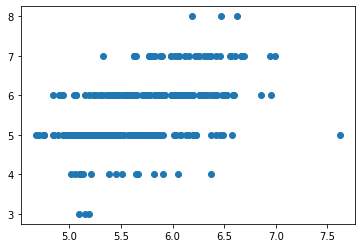

In [44]:
y1_pred = w1.predict(x1_test)
print(f'Coeficiente de correlación: {w1.score(x1_test, y1_test)}')
plt.scatter(y1_pred, y1_test)
plt.show()

Finalemente, procederemos a realizar una inferencia con el modelo obtenido:

In [51]:
#Parámetros

w1_1 = 7.4 #fixed acidity
w1_2 = 0.7 #Volatile acidity
w1_3 = 0 #Citirc acid
w1_4 = 1.9 #Residual sugar
w1_5 = 0.076 #Chlorides
w1_6 = 11 #Free sulfur dioxide
w1_7 = 34 #Total sulfur dioxide
w1_8 = 0.9978 #Density
w1_9 = 3.51 #pH
w1_10 = 0.56 #Sulphates 
w1_11 = 9.4 #Alcohol
y1_real = 5 #Calidad

w1_inf= np.array([[w1_1, w1_2, w1_3, w1_4, w1_5, w1_6, w1_7, w1_8, w1_9, w1_10, w1_11]], dtype=float)

y1_inf = w1.predict(w1_inf)
print(f"La puntuación estimada es: {y1_inf[0, 0]}\n")
print(f"La puntuación real es: {y1_real}")

La puntuación estimada es: 5.049293410003569

La puntuación real es: 5


Como se puede ver, el resultado es bueno, sin embargo la gráfica obtenido no lo fue ya que la puntuación se trata de una cantidad discreta, se pudiera optar por realizar un redondeo o simplemente tener en consideración esta limitante.

## Caso 2: Vino blanco

In [39]:
#Armamos los vectores con los campos que se utilizarán
x2 = np.array(white_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], dtype=float)
y2 = np.array(white_wine[['quality']], dtype=np.float)

#Dividimos los datos entre datos de entrenamiento y de validación
ts2 = 0.20 #Porcentaje de prueba
seed2 = 101 #Semilla para los datos aleatorios
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=ts2, random_state=seed2)

#Entrenamos
w2 = LinearRegression().fit(x2_train, y2_train)

print('coeficientes obtenidos del entrenamiento para el caso del vino blanco\n')

for j in  range(np.shape(w2.coef_)[1]):
    print(f'{white_wine.columns[j]}: {w2.coef_[0, j]}')
    

coeficientes obtenidos del entrenamiento para el caso del vino blanco

fixed acidity: 0.057045807112963844
volatile acidity: -1.7908985294295212
citric acid: 0.03764342993766864
residual sugar: 0.08099217759237978
chlorides: -0.2309716155914587
free sulfur dioxide: 0.004371043746924708
total sulfur dioxide: -0.00033728562735402257
density: -148.52051552984753
pH: 0.6252147546988374
sulphates: 0.6689112913071013
alcohol: 0.19781696812086544


Coeficiente de correlación: 0.27300766003955523


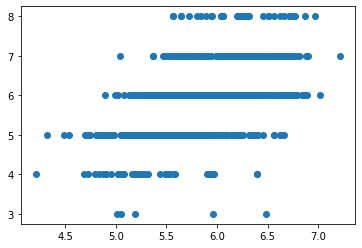

In [40]:
y2_pred = w2.predict(x2_test)
print(f'Coeficiente de correlación: {w2.score(x2_test, y2_test)}')
plt.scatter(y2_pred, y2_test)
plt.show()

In [54]:
#Parámetros

w2_1 = 6.6 #fixed acidity
w2_2 = 0.17 #Volatile acidity
w2_3 = 0.38 #Citirc acid
w2_4 = 1.5 #Residual sugar
w2_5 = 0.032 #Chlorides
w2_6 = 28 #Free sulfur dioxide
w2_7 = 112 #Total sulfur dioxide
w2_8 = 0.9914 #Density
w2_9 = 3.25 #pH
w2_10 = 0.55 #Sulphates 
w2_11 = 11.4 #Alcohol
y2_real = 7 #Calidad

w2_inf= np.array([[w2_1, w2_2, w2_3, w2_4, w2_5, w2_6, w2_7, w2_8, w2_9, w2_10, w2_11]], dtype=float)

y2_inf = w2.predict(w2_inf)
print(f"La puntuación estimada es: {y2_inf[0,0]}\n")
print(f"La puntuación real es: {y2_real}\n")

La puntuación estimada es: 6.29429554276237

La puntuación real es: 7

